### 1차 선형 회귀 모델 테스트()
    - 시청률 데이터 미사용
    - 노출(분) imputation 안함
    - datetime, object variable 삭제
    - 12개월 전체 데이터를 0.25, 0.75 : test, train으로 학습한 결과 R2 0.943, MAPE 156

### 2차 비선형 회귀 모델 테스트(SVR : SVM Regression)
    - 1차와 동일 조건으로 비선형 모델 사용
    - 모델 파라미터인 C등을 수정하면 모델 개선가능
    - 1차와 동일한 조건에서 비교 했을 때 , R2 0.86, MAPE 208 선형 모델을 사용하는것이 MAPE점수를 잘 받는데 도움 되는 듯.(워낙 많은 데이터의 기울기를 예측해야 해서 그런지 공부해봐야 할듯.))
    - https://m.blog.naver.com/PostView.nhn?blogId=jiehyunkim&logNo=220856198972&proxyReferer=https:%2F%2Fwww.google.com%2F -> 회귀모델의 평가 점수를 높이는데 도움되니 공부 필요.

### 3차로 필요한 것은 1차,2차에 미사용,삭제,보정하지 않은 데이터를 추가해야 될 것으로 보임.
    - 기본적으로 MAPE가 비선형 회귀모델을 사용하게 되면 208까지 나오는 것으로 확인.
    - 3차에 1,2차 미사용 조건들을 사용해서 선형, 비선형으로 재확인 필요
    - 문제 조건을 명확히 이해 파악해서 재 학습 결과 도출.

In [2]:
import pandas as pd

In [3]:
performance_data = pd.read_excel('01_제공데이터/performance_data.xlsx',header = 1)
rating_data = pd.read_excel('01_제공데이터/rating_data.xlsx',header = 1)

In [4]:
performance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
방송일시     38309 non-null datetime64[ns]
노출(분)    21525 non-null float64
마더코드     38309 non-null int64
상품코드     38309 non-null int64
상품명      38309 non-null object
상품군      38309 non-null object
판매단가     38309 non-null int64
취급액      37372 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB


In [5]:
rating_data.head()

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,06:00,0.0,0.000,0.0,0.0,0.026,0.0,0.0,0.0,0.0,...,0.008,0.0,0.0,0.0,0.0,0.017,0.0,0.00,0.0,0.002
1,06:01,0.0,0.009,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.008,0.0,0.0,0.0,0.0,0.017,0.0,0.00,0.0,0.002
2,06:02,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.008,0.0,0.0,0.0,0.0,0.017,0.0,0.02,0.0,0.002
3,06:03,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.008,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.003
4,06:04,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.008,0.0,0.0,0.0,0.0,0.000,0.0,0.00,0.0,0.003


In [6]:
data_new = performance_data.dropna()

In [7]:
data_new.shape

(20588, 8)

In [8]:
data_new = data_new.reset_index(drop=True)

In [9]:
data_new.head(3)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
2,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


In [10]:
df = data_new.drop(['방송일시','상품명', '상품군'], axis=1)

In [11]:
y = data_new.취급액.values

In [12]:
y

array([ 2099000.,  3262000.,  6672000., ...,  4573000.,  9149000.,
       50929000.])

In [13]:
x = data_new.판매단가.values

In [14]:
x

array([ 39900,  39900,  39900, ..., 178000, 178000, 178000], dtype=int64)

In [15]:
import matplotlib.pyplot as plt

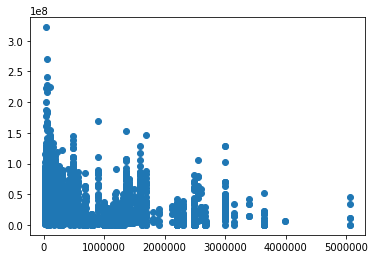

In [16]:
plt.scatter(x,y)

In [17]:
df

,노출(분),마더코드,상품코드,판매단가,취급액
0,20.0,100346,201072,39900,2099000.0
1,20.0,100346,201072,39900,3262000.0
2,20.0,100346,201072,39900,6672000.0
3,20.0,100305,200974,59000,6819000.0
4,20.0,100305,200974,59000,15689000.0
5,20.0,100305,200974,59000,25370000.0
6,20.0,100808,202377,59900,16133000.0
7,20.0,100808,202377,59900,30061000.0
8,20.0,100808,202377,59900,53542000.0
9,20.0,100816,202404,79000,16075000.0


In [18]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [19]:
df.head()

,노출(분),마더코드,상품코드,판매단가,취급액
0,20.0,100346,201072,39900,2099000.0
1,20.0,100346,201072,39900,3262000.0
2,20.0,100346,201072,39900,6672000.0
3,20.0,100305,200974,59000,6819000.0
4,20.0,100305,200974,59000,15689000.0


In [20]:
df_s = df

In [21]:
data_s = std_scaler.fit(df)

In [22]:
print(data_s.mean_)

[2.00519129e+01 1.00393081e+05 2.01232788e+05 2.18029561e+05
 3.08235709e+07]


In [23]:
df_s = std_scaler.transform(df_s)
df_s = pd.DataFrame(df_s, columns=df.columns, index=list(df.index.values))


In [24]:
from sklearn.model_selection import train_test_split

In [42]:
x = df_s.drop(['취급액'], axis=1)

In [43]:
x.shape

(20588, 4)

In [44]:
y = df_s['취급액']

In [45]:
y.shape

(20588,)

In [ ]:
df_s.head()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [35]:
from sklearn.linear_model import LinearRegression

In [54]:
line_fitter = LinearRegression()
line_fitter.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_predicted = line_fitter.predict(X_test)

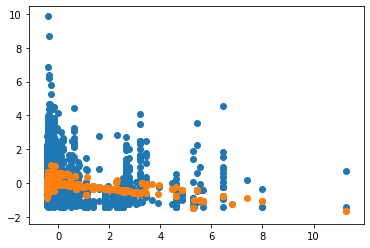

In [58]:
plt.scatter(X_test['판매단가'], y_test)
plt.scatter(X_test['판매단가'],y_predicted)

In [49]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [59]:
mean_absolute_percentage_error(y_test, y_predicted)

156.052014555012

In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predicted)


0.9433201448766523

In [61]:
from sklearn.linear_model import LogisticRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_predicted2 = model.predict(X_test)

In [64]:
mean_absolute_percentage_error(y_test, y_predicted2)

156.052014555012

In [65]:
mean_squared_error(y_test, y_predicted2)


0.9433201448766523

In [66]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)     

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [67]:
svm_predicted = regr.predict(X_test)

In [68]:
mean_squared_error(y_test, svm_predicted)


0.8665007014732272

In [69]:
mean_absolute_percentage_error(y_test, svm_predicted)

208.16385277078524